<a href="https://colab.research.google.com/github/artem-barsov/Numerical-Methods/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt

#### Форматирование

In [ ]:
def get_script(s, script='sup'):
    if script == 'sup':
        return s.translate(s.maketrans('0123456789', '⁰¹²³⁴⁵⁶⁷⁸⁹'))
    if script == 'sub':
        return s.translate(s.maketrans('0123456789', '₀₁₂₃₄₅₆₇₈₉'))
    return s

In [ ]:
def polynom2str(a, x = 'x', script='sup'):
    s = ''
    frm = 0
    while a[frm]==0: frm += 1
    first_done = False
    for i in range(frm, len(a)):
        if a[i] == 0: continue
        deg = len(a) - i - 1
        if first_done:
            s += ('+ ' if a[i] > 0 else '- ')
        elif a[i] < 0:
            s += '-'
        first_done = True
        if abs(a[i]) != 1 or deg == 0:
            s += '%g'%abs(a[i])
        if script == 'sup':
            if deg > 0:
                s += x
                if deg != 1:
                    s += get_script(str(deg), script)
                s += ' '
        else:
            s += x + get_script(str(i+1), script) + ' '
    return s if s!='' else '0'

In [ ]:
def print_system(a, b):
    for i in range(len(a)):
        print('{', polynom2str(a[i], script='sub'), '=', b[i])

In [ ]:
def print_x_solution(x, sym = 'x'):
    for i in range(1, len(x)+1):
        print(f'{sym}{get_script(str(i), "sub")} = %g;' % round(x[i-1], 3), end='  ')
    print()

In [ ]:
def print_vec_solution(x, sym = 'x'):
    for i in range(1, len(x)+1):
        print(f'{sym}{get_script(str(i), "sub")} = {x[i-1]};')
    print()

In [ ]:
def print_comp_solution(x, sym = 'x'):
    for i in range(1, len(x)+1):
        s = str(round(x[i-1][0], 4))
        if x[i-1][1] != 0:
            if x[i-1][1] < 0: s += ' - ' 
            else: s += ' + '
            s += str(round(abs(x[i-1][1]), 4)) + ' i'
        print(f'{sym}{get_script(str(i), "sub")} = {s};')
    print()

#### 1. Реализовать методы простой итерации и Ньютона решения нелинейных уравнений в виде программ, задавая в качестве входных данных точность вычислений. С использованием разработанного программного обеспечения найти положительный корень нелинейного уравнения (начальное приближение определить графически). Проанализировать зависимость погрешности вычислений от количества итераций.

In [ ]:
def d_dx(f, e = 0.0001):
    return lambda x: (f(x+e) - f(x)) / e

In [ ]:
f = lambda x: 2**x - x**2 - 0.5
g = lambda x: sqrt(2**x - 0.5)
a, b = 0.5, 2

##### Метол простых итераций

In [ ]:
def simple_iter(f, a, b, e = 0.0001):
    x, x_prev = (a + b) / 2, (a + b) / 2
    q = max(abs(d_dx(f)(a)), abs(d_dx(f)(b)))
    if q >= 1:
        print('Не выполнено условие сходимости')
        return
    vals = []
    while True:
        x_prev, x = x, f(x)
        vals.append(x)
        if abs(x - x_prev) * q / (1 - q) <= e:
            break
    return x, vals

Решение уравнения: 1.5738240335890754
Количество итераций: 26
Зависимость погрешности вычислений от количества итераций:


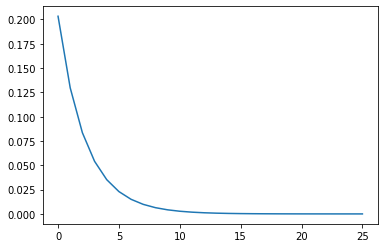

In [ ]:
x, vals = simple_iter(g, a, b, 1e-5)
vals = np.abs(np.array(vals) - x)
print('Решение уравнения:', x)
print('Количество итераций:', len(vals))
print('Зависимость погрешности вычислений от количества итераций:')
plt.plot(vals);

##### Метод Ньютона

In [ ]:
def newton_tangent(f, a, b, e = 0.001):
    df_dx = d_dx(f)
    d2f_dx2 = d_dx(df_dx)
    der_sign1 = df_dx(np.linspace(a, b, 15)) > 0
    der_sign2 = d2f_dx2(np.linspace(a, b, 15)) > 0
    if any(der_sign1) and not all(der_sign1):
        print('Знак первой производной не постоянен')
        return
    if any(der_sign2) and not all(der_sign2):
        print('Знак второй производной не постоянен')
        return
    if f(a) > 0 and f(b) > 0 or f(a) < 0 and f(b) < 0:
        return
    x = b
    if f(x) > 0 and d2f_dx2(x) < 0 or f(x) < 0 and d2f_dx2(x) > 0:
        print('Неудачно выбрано начальное приближение')
        return
    vals = []
    while True:
        x_prev, x = x, x - f(x) / df_dx(x)
        vals.append(x)
        if abs(x - x_prev) < e:
            break
    return x, vals

Решение уравнения: 1.573828923644949
Количество итераций: 5
Зависимость погрешности вычислений от количества итераций:


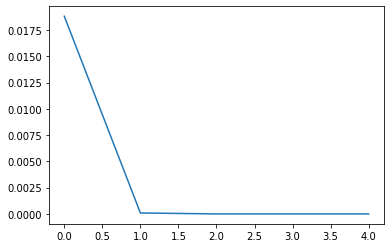

In [ ]:
x, vals = newton_tangent(f, a, b, 1e-10)
vals = np.abs(np.array(vals) - x)
print('Решение уравнения:', x)
print('Количество итераций:', len(vals))
print('Зависимость погрешности вычислений от количества итераций:')
plt.plot(vals);

#### 2. Реализовать методы простой итерации и Ньютона решения систем нелинейных уравнений в виде программного кода, задавая в качестве входных данных точность вычислений. С использованием разработанного программного обеспечения решить систему нелинейных уравнений (при наличии нескольких решений найти то из них, в котором значения неизвестных являются положительными); начальное приближение определить графически. Проанализировать зависимость погрешности вычислений от количества итераций.

In [ ]:
def d_dx1(f, e = 0.0001):
    return lambda x1, x2: (f(x1+e, x2) - f(x1, x2)) / e
def d_dx2(f, e = 0.0001):
    return lambda x1, x2: (f(x1, x2+e) - f(x1, x2)) / e
def norm_c(a):
    a = np.asarray(a).T
    if hasattr(a[0], '__iter__'):
        a = [sum(abs(ai)) for ai in a]
    return max(a)
class FuncMatrix:
    def __init__(self, M):
        self.M = M
    def __call__(self, x1, x2):
        return [[self.M[0][0](x1, x2), self.M[0][1](x1, x2)],
                [self.M[1][0](x1, x2), self.M[1][1](x1, x2)]]

In [ ]:
f1 = lambda x1, x2: (x1**2 + 4) * x2 - 8
f2 = lambda x1, x2: (x1 - 1)**2 + (x2 - 1)**2 - 4

h2 = lambda x1, x2: 8 / (x1**2 + 4)
h1 = lambda x1, x2: sqrt(4 - (x2 - 1)**2) + 1

a, b = [2, 4], [0, 2]

##### Метод Ньютона

In [ ]:
def newton_system(f1, f2, a, b, e = 0.001):
    J = FuncMatrix([[d_dx1(f1), d_dx2(f1)],
                    [d_dx1(f2), d_dx2(f2)]])
    A1 = FuncMatrix([[f1, d_dx2(f1)],
                     [f2, d_dx2(f2)]])
    A2 = FuncMatrix([[d_dx1(f1), f1],
                     [d_dx1(f2), f2]])
    x = np.array([(a[0] + a[1]) / 2, (b[0] + b[1]) / 2])
    vals = []
    while True:
        x_prev = x.copy()
        vals.append(x)
        x[0], x[1] = x[0] - np.linalg.det(A1(x[0], x[1])) / np.linalg.det(J(x[0], x[1])), x[1] - np.linalg.det(A2(x[0], x[1])) / np.linalg.det(J(x[0], x[1]))
        if norm_c(x - x_prev) <= e:
            break
    return x, vals

Решение уравнения: x₁ = 2.965;  x₂ = 0.626;  
Количество итераций: 5
Зависимость погрешности вычислений от количества итераций:


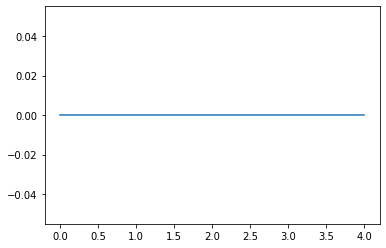

In [ ]:
x, vals = newton_system(f1, f2, a, b, 1e-9)
vals = [norm_c(x) for x in np.abs(np.array(vals) - np.array(x))]
print('Решение уравнения: ', end='')
print_x_solution(x)
print('Количество итераций:', len(vals))
print('Зависимость погрешности вычислений от количества итераций:')
plt.plot(vals);

##### Метод простых итераций

In [ ]:
def simple_iter_system(f1, f2, a, b, e = 0.001):
    phi = FuncMatrix([[d_dx1(f1), d_dx2(f1)],
                      [d_dx1(f2), d_dx2(f2)]])
    xy_grid = np.mgrid[a[0]:a[1]:15j, b[0]:b[1]:15j].reshape(2, -1).T
    q = max([norm_c(phi(x, y)) for x, y in xy_grid])
    if q >= 1:
        print('Не выполнено условие сходимости')
        return
    x = np.array([(a[0] + a[1]) / 2, (b[0] + b[1]) / 2])
    vals = []
    while True:
        x_prev = x.copy()
        vals.append(x)
        x[0], x[1] = f1(x[0], x[1]), f2(x[0], x[1])
        if norm_c(x - x_prev) * q / (1 - q) <= e:
            break
    return x, vals

In [ ]:
x, vals = simple_iter_system(h1, h2, a, b, 1e-19)
vals = [norm_c(x) for x in np.abs(np.array(vals) - np.array(x))]
print('Решение уравнения: ', end='')
print_x_solution(x)
print('Количество итераций:', len(vals))

Решение уравнения: x₁ = 3;  x₂ = 0.615;  
Количество итераций: 1
